# ChEMBL Transport Distances

This notebook shows an example of computing optimal transport distances between groups of molecules from the ChEMBL dataset. The data used here is a set of tight binding compounds (IC50 <= 50 nM). Classes are defined by a molecule's target.

In [1]:
import sys
sys.path.append('../OTDD')

import pandas as pd
import numpy as np

from otdd import *
from plot import *
from chem import *

# Load Data

In [2]:
df = pd.read_csv('../data/chembl_subset.csv')

In [3]:
df.shape

(59072, 5)

In [4]:
df.head()

,Molecule ChEMBL ID,Smiles,Target ChEMBL ID,Target Name,Standard Value
0,CHEMBL3935196,O=C(OC1C2CC3CC(C2)CC1C3)N1CCC(CO)(c2ccccc2)CC1,CHEMBL4235,11-beta-hydroxysteroid dehydrogenase 1,8.83
1,CHEMBL460393,C[C@H](NC1=NC(=O)C(C)(C2(O)CCC2)S1)c1ccc(F)cc1,CHEMBL4235,11-beta-hydroxysteroid dehydrogenase 1,32.00
2,CHEMBL3741144,COCc1cc(C)n2ncc(C(=O)N[C@H]3C4CC5CC3C[C@](O)(C...,CHEMBL4235,11-beta-hydroxysteroid dehydrogenase 1,15.85
3,CHEMBL460923,C[C@](O)(c1ccc(C(=O)N(C2CC2)[C@H]2CC[C@](C#N)(...,CHEMBL4235,11-beta-hydroxysteroid dehydrogenase 1,43.00
4,CHEMBL460933,C[C@](O)(c1ccc(C(=O)N(C2CC2)[C@H]2CC[C@](O)(c3...,CHEMBL4235,11-beta-hydroxysteroid dehydrogenase 1,28.50


In [8]:
d1 = df[df['Target Name'].isin(df['Target Name'].unique()[:10])]
d2 = df[df['Target Name'].isin(df['Target Name'].unique()[10:20])]

The `SmilesDataset` class converts SMILES strings to fingerprints based on the `radius` and `bits` values

In [9]:
data1 = SmilesDataset(d1.Smiles.values, d1['Target Name'].values, radius=3, bits=2048)
data2 = SmilesDataset(d2.Smiles.values, d2['Target Name'].values, radius=3, bits=2048)

# Define Cost and Distance Functions

For comparing fingerprints, we use the `TanimotoDistance` class. This is equivalent to using the `POTDistance` with the `jaccard` metric for ground cost. Technically speaking, the `jaccard` metric computes `1-Tanimoto` to serve as a distance metric.

For example, if you computed the Tanimoto similarity between a compound and itself, you would get a value of 1 (ie identical fingerprints). The Jaccard distance is `1-Tanimoto=0`, which is what we expect for self-distance.

For cost, we use the Sinkhorn algorithm

In [10]:
distance_function = TanimotoDistance()

In [11]:
cost_function = SinkhornCost(distance_function, entropy=0.05)

# Feature Distance

Here we compute the cost and optimal coulpling using only the feature space

In [12]:
outputs = cost_function.distance(data1.features, data2.features)

In [13]:
outputs[0]

0.8848937080202202

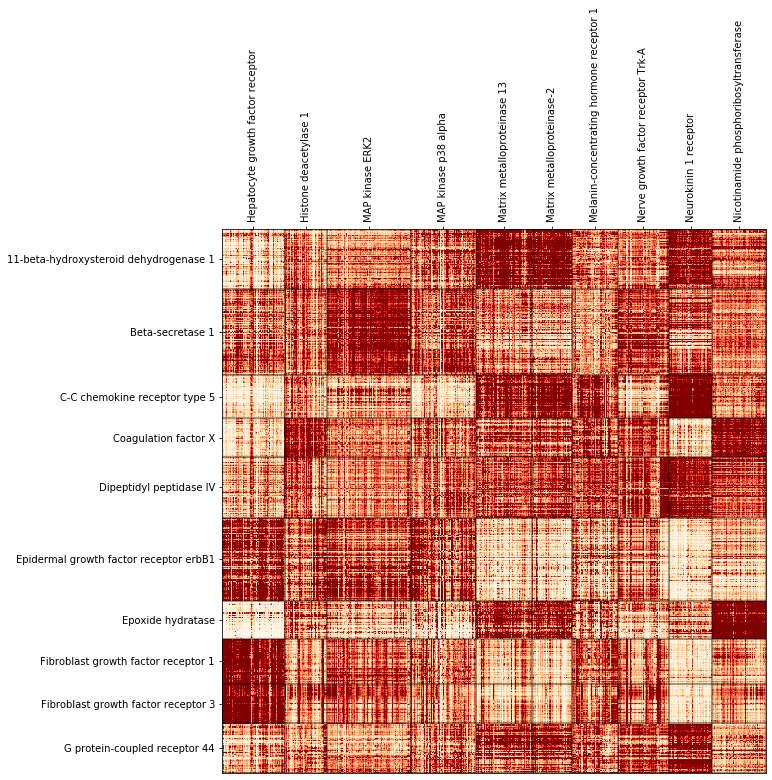

In [15]:
plot_coupling(outputs[1], outputs[2], data1.labels, data2.labels,
                  data1.classes, data2.classes, figsize=(10,10), cmap='OrRd')

# Label Distance

Here we compute the cost and optimal coupling with label distances

In [16]:
outputs2 = cost_function.distance_with_labels(data1.features, data2.features, 
                                              data1.labels, data2.labels)

computing
0
1
2
3
4
5
6
7
8
9
distance finished
indexing
final cost


In [17]:
outputs2[0]

1.2617429074938145

Using label distances incorporates class-to-class similarity in coupling

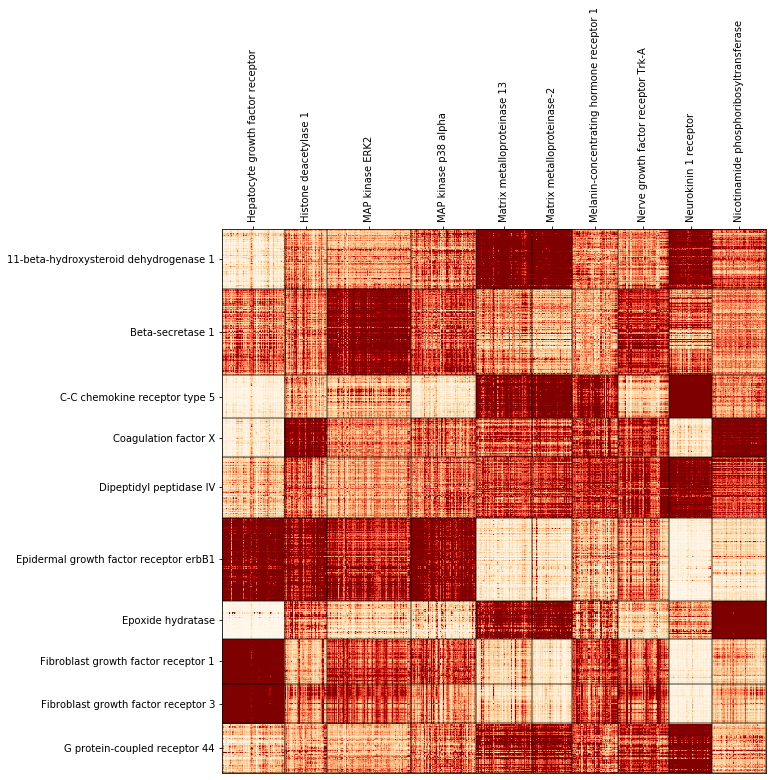

In [18]:
plot_coupling(outputs2[1], outputs2[2], data1.labels, data2.labels,
                  data1.classes, data2.classes, figsize=(10,10), cmap='OrRd')

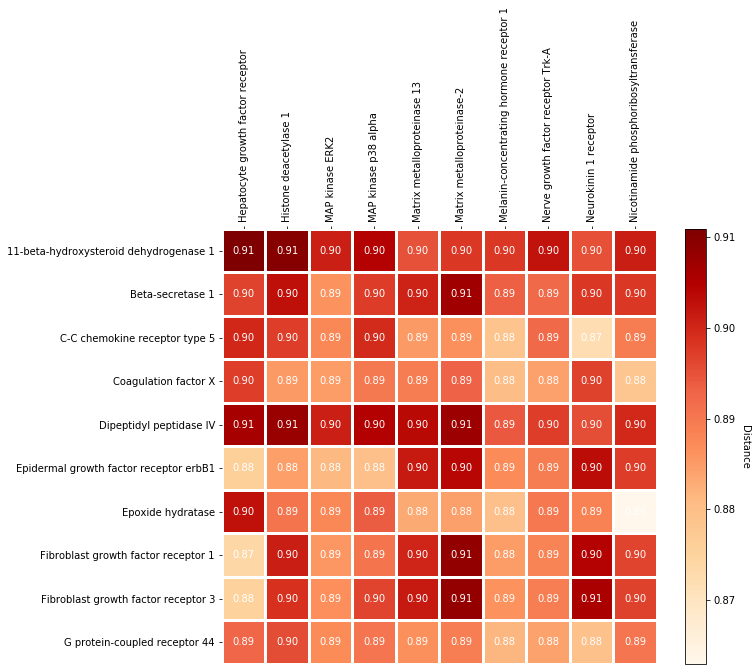

In [19]:
plot_class_distances(outputs2[3], data1.classes, data2.classes, 
                            cmap='OrRd', figsize=(10,8), text=True)